### Linear Problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, Dataset
import seaborn as sns
from torch import nn
from torch.nn import functional as F

### Data Preparation

In [2]:
data = pd.read_csv('data/test.csv')
data.head()

,x,y,color
0,2.684292,3.867108,0.0
1,2.707883,4.002614,0.0
2,2.705905,3.859686,0.0
3,4.536191,5.240051,0.0
4,3.656068,4.461771,0.0


<AxesSubplot:xlabel='x', ylabel='y'>

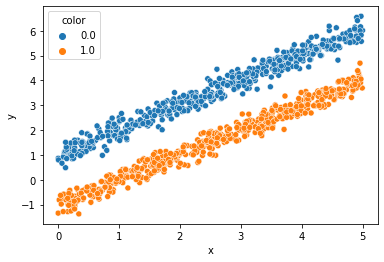

In [3]:
sns.scatterplot(data=data, x='x', y='y',hue='color')

In [4]:
class Data(Dataset):
    def __init__(self, path, transform=None, shuffle=True):
        self.dataFrame = pd.read_csv(path)
        self.xy = pd.read_csv(path).values
        
        if shuffle:
            np.random.shuffle(self.xy)
        self.len = self.xy.shape[0]
        self.x = self.xy[:, :-1]
        self.y = self.xy[:, -1]
        self.transform = transform
        print(self.x.shape)
        
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        
        if self.transform:
            sample = self.transform(sample)
        return sample
    
    def __len__(self):
        return self.len
    
    def plot(self):
        sns.scatterplot(data=self.dataFrame, x='x', y='y',hue='color')
        plt.show()
        

### Transformers on our data

In [5]:
class ToTensor:
    def __call__(self, samples):
        x, y = samples
        return torch.from_numpy(x.astype('float32')) ,torch.from_numpy(np.array(y, dtype='float32'))

In [6]:
train = Data(path='data/train.csv', transform=ToTensor(), shuffle=True)
test  = Data(path='data/test.csv', transform=ToTensor(),shuffle=True )

(4000, 2)
(1000, 2)


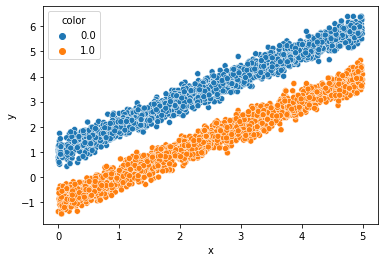

In [7]:
train.plot()

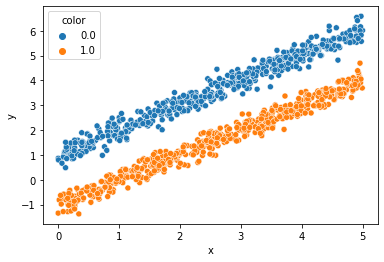

In [8]:
test.plot()

In [9]:
train_set = DataLoader(dataset=train,
                      batch_size =5,
                      shuffle=True)
test_set = DataLoader(dataset=test,
                      batch_size =5,
                      shuffle=False)

### Predicting the Color

In [10]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2,32)
        self.fc2 = nn.Linear(32,64)
        self.fc3 = nn.Linear(64, 1)
    def forward(self,x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

net = Net()
net

Net(
  (fc1): Linear(in_features=2, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)

In [11]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

In [12]:
EPOCHS = 5
for epoch in range(EPOCHS):
    print(f'Epochs: {epoch+1}/{EPOCHS}')
    for data in train_set:
        X, y = data
        optimizer.zero_grad()
        # forward pass
        output = net(X.view(-1, 2))
       
        #calculate loss
        loss = criterion(output, y.unsqueeze(1))
        ## backward pass
        loss.backward()
        # update the weights
        optimizer.step()
    print("loss: ", loss.item())
    

Epochs: 1/5
loss:  0.1253291517496109
Epochs: 2/5
loss:  0.002559717744588852
Epochs: 3/5
loss:  0.005565945524722338
Epochs: 4/5
loss:  0.004371825605630875
Epochs: 5/5
loss:  0.00926273874938488


In [13]:
total, correct = 0, 0
with torch.no_grad():
    for data in test_set:
        X, y = data
        outputs = net(X.view(-1, 2))
        for i in range(len(torch.round(outputs))):
            if y[i] == torch.round(outputs[i]):
                correct +=1
            total +=1
    print(correct/total)

1.0


In [14]:
total, correct = 0, 0
with torch.no_grad():
    for data in train_set:
        X, y = data
        outputs = net(X.view(-1, 2))
        for i in range(len(torch.round(outputs))):
            if y[i] == torch.round(outputs[i]):
                correct +=1
            total +=1
    print(correct/total)

1.0


### Making Predictions

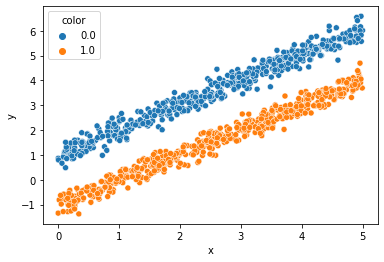

In [15]:
test.plot()

In [16]:

test[0]
torch.Tensor([1., 0.])
torch.round(net(torch.Tensor([1., 2.]))).item()

0.0

> Done